# Customer Churn Prediction - A Hexaware Challenger Use Case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import flask as flsk

from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.externals import joblib

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\49301\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Exploratory Data Analysis

In [2]:
df=pd.read_csv(r'D:\Challenger\Churn_Prediction\Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

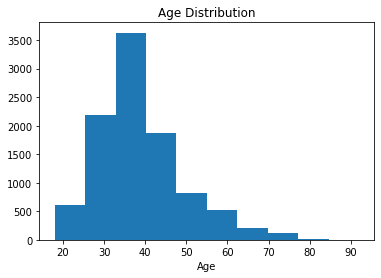

In [8]:
plt.hist(df['Age'])
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

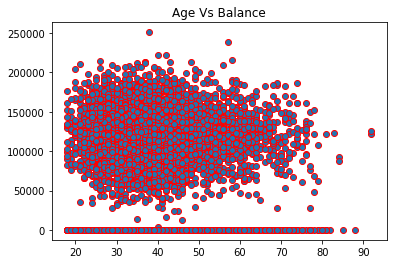

In [9]:
plt.scatter(df['Age'], df['Balance'],edgecolors='Red')
plt.title("Age Vs Balance")
plt.show()

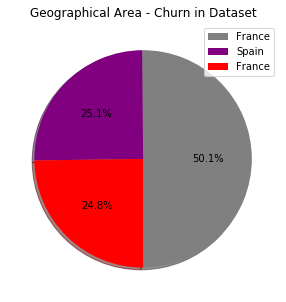

In [10]:
# Data to plot
sizes = df['Geography'].value_counts(sort = True)
labels=df['Geography']
colors = ["grey","purple","red"] 
rcParams['figure.figsize'] = 5,5

# Plot
plt.pie(sizes,colors=colors,autopct='%1.1f%%',shadow=True,startangle=270)
plt.title('Geographical Area - Churn in Dataset')
plt.legend(labels)
plt.show()

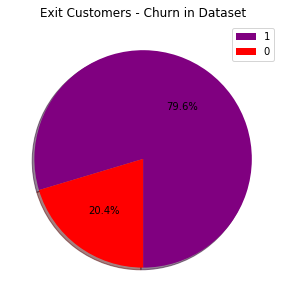

In [11]:
# Data to plot
sizes = df['Exited'].value_counts(sort = True)
labels=df['Exited']
colors = ["purple","red"] 
rcParams['figure.figsize'] = 5,5

# Plot
plt.pie(sizes,colors=colors,autopct='%1.1f%%',shadow=True,startangle=270)
plt.title('Exit Customers - Churn in Dataset')
plt.legend(labels)
plt.show()

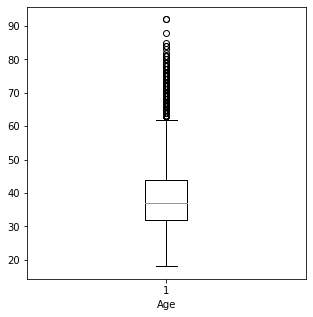

In [12]:
plt.boxplot(df['Age'])
plt.xlabel("Age")
plt.show()

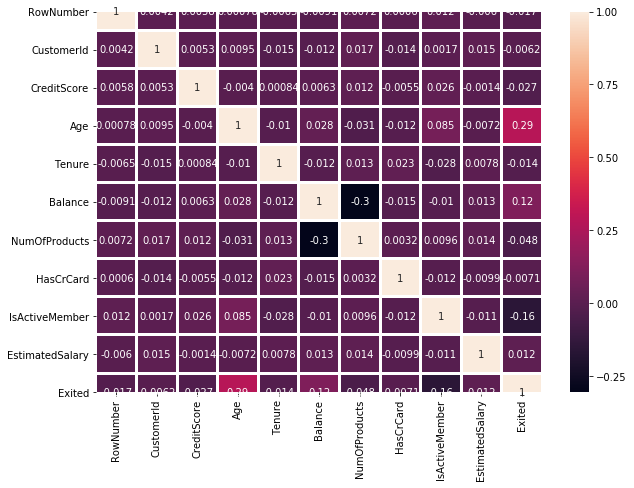

In [13]:
corr_data = pd.DataFrame(df)
plt.figure(figsize=(10,7))
_ = sns.heatmap(corr_data.corr(),annot=True,linewidths=2)

In [14]:
dataset = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)

In [15]:
Geography = pd.get_dummies(df.Geography).iloc[:,1:]
Gender = pd.get_dummies(df.Gender).iloc[:,1:]

### Model Building - Random Forest Tree

In [16]:
dataset = pd.concat([dataset,Geography,Gender], axis=1)

In [17]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [18]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Germany            10000 non-null uint8
Spain              10000 non-null uint8
Male               10000 non-null uint8
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=100)  

In [22]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [23]:
predictions = classifier.predict(X_test)

In [24]:
print("Accuracy",accuracy_score(y_test, predictions ))

Accuracy 0.8685


In [25]:
result = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[1537   58]
 [ 205  200]]


In [26]:
print("Classification Report\n",classification_report(y_test,predictions )) 

Classification Report
              precision    recall  f1-score   support

          0       0.88      0.96      0.92      1595
          1       0.78      0.49      0.60       405

avg / total       0.86      0.87      0.86      2000



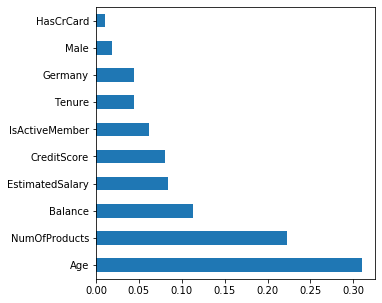

In [27]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Model Deployment

In [2]:
joblib.dump(classifier, "churn_pred.pkl")

NameError: name 'joblib' is not defined

In [1]:
obj = joblib.load("churn_pred.pkl")

NameError: name 'joblib' is not defined

In [46]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


In [49]:
list = [597, 39, 8, 162532, 3, 1, 0, 36051, 1, 0, 0]

In [42]:
print(obj.predict([list]))

[0]


### Flask Integration

In [ ]:
from flask import Flask,request,render_template,url_for,jsonify
from sklearn.externals import joblib
import pickle

churn_pred = joblib.load("./churn_pred.pkl")

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/predict',methods=['POST','GET'])
def predict():
    if request.method == 'POST':
        return render_template('home.html', Pred_Value="Hai")
        int_features = [int(x) for x in request.form.values()]
        
        final_features = [np.array(int_features)]
      
        pred_Value = churn_pred.predict(final_features)
        output = round(pred_Value[0], 2)
  
        if int(output)== 1:
            pred_val ='Customer Churn-Yes'
        else: 
            pred_val ='Customer Churn-No' 
    
        return render_template('home.html', Pred_Value="Haai")
        

if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


C:\Users\49301\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Apr/2020 10:49:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Apr/2020 10:49:53] "POST /result HTTP/1.1" 404 -
